# Project: Investigate a Dataset (The Bike share data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li> 
</ul>

<a id='intro'></a>
## Introduction

The below questions are the question that will be used for exploring the Bike share data

1. **Research Question 1**: is being a user relvant to the age and is customer or a subscriber relevant to the user's gender?

2. **Research Question 2**: What are the possible factors that affects the trip duration?

In [108]:
import time
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

>  This **section** of the report is didicated for **checking** the data for **any missing values** or **duplicated row** as well as **cleaning** and **clarifying it** whenever needed

### General Properties

In [109]:
# Load the data and print out a few lines. Perform operations to inspect data
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [110]:
df.info() #Step 1: The check for missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

 > The **check** for missing data result: **missing** data were found

In [111]:
#Step 2: dropping rows with missing data
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

 > **Second check** for missing data result: **No missing** data were found

In [112]:
sum(df.duplicated()) #Step 3: The check for duplcated data


0

> The check for **duplicated **data result: **no** duplicated data were found

In [113]:
df['member_birth_year'] = df['member_birth_year'].astype(int) # step 4:converting the'member_birth_year'>column from float to integer

In [114]:
df.query('member_birth_year>2020') #step 5:Verify that there are no rows that have 'member_birth_year'>2020 as age can't be zero or have a negative value


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


In [115]:
#STep 6 splitting the datetime series data to date and time,and drop the 'start_time'& 'end_time' columns

df['start_time'] = pd.to_datetime(df['start_time'])
df['Month_start'] = df['start_time'].dt.month_name() #Extract the month data from the datetime series--start_time
df['Weekday_start'] = df['start_time'].dt.day_name() #Extract the day name from the datetime series--start_time
df['Time_start'] = df['start_time'].dt.time #Extract the time data from the datetime series--start_time
df['end_time'] = pd.to_datetime(df['end_time'])
df['Month_end'] = df['end_time'].dt.month_name() #Extract the month data from the datetime series--end_time
df['Weekday_end'] = df['end_time'].dt.day_name() #Extract the day name from the datetime series--end_time
df['Time_end'] = df['end_time'].dt.time #Extract the time data from the datetime series--end_time
df.pop('start_time') #Drop the start_time column
df.pop('end_time') #Drop the end_time column
df.head(1)


,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Month_start,Weekday_start,Time_start,Month_end,Weekday_end,Time_end
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,February,Thursday,17:32:10.145000,March,Friday,08:01:55.975000


In [116]:
# STep 7: The 'bike_id','start_station_id','start_station_latitude','start_station_longitude','end_station_id', 'end_station_latitude'and 'end_station_longitude' columns are irrlevant, as such they will be dropped

df.pop('bike_id')
df.pop('start_station_id')
df.pop('start_station_latitude')
df.pop('start_station_longitude')
df.pop('end_station_id')
df.pop('end_station_latitude')
df.pop('end_station_longitude')
df.head(1)

,duration_sec,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Month_start,Weekday_start,Time_start,Month_end,Weekday_end,Time_end
0,52185,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984,Male,No,February,Thursday,17:32:10.145000,March,Friday,08:01:55.975000


In [117]:
#STep 8 converting the duration columns unit from seconds to minutes,and changing the column label from 'duration_sec' to 'duration_Min'

df['duration_sec'] = df['duration_sec'].div(60).round()
df= df.rename(columns={'duration_sec':'duration_Min'})
df.head(1)

,duration_Min,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Month_start,Weekday_start,Time_start,Month_end,Weekday_end,Time_end
0,870.0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984,Male,No,February,Thursday,17:32:10.145000,March,Friday,08:01:55.975000


In [118]:
#Step 9:Converting the meber birth year column to age assuming that the data is from 2019, so it will refelct on the user's age in 2019 which th time of usage
df['member_birth_year'] = 2019-df['member_birth_year']

In [119]:
#Step 10: Develop a dictinory for a clearer labels
New_Labels_dict = {'duration_Min':'Trip_Duration_Min','start_station_name':'Start_Station',
                   'end_station_name':'End_Station','user_type':'user_type','member_birth_year':'user_age',
                   'member_gender':'User_Gender','bike_share_for_all_trip':'Bike_Share',
                   'Month_start':'Start_Month','Weekday_start':'Start_day','Time_start':'Start_Time',
                   'Month_end':'End_Month','End_Day':'Weekday_end','End_Time':'Time_end'}
#step 11 Renaming the labels 
df=df.rename(columns=New_Labels_dict)
#step 12 Removing the spaces form the labels and convert the lower case letters to capital case ones.
df.rename(columns=lambda x: x.strip().upper(),inplace=True)    
df.head(1)

,TRIP_DURATION_MIN,START_STATION,END_STATION,USER_TYPE,USER_AGE,USER_GENDER,BIKE_SHARE,START_MONTH,START_DAY,START_TIME,END_MONTH,WEEKDAY_END,TIME_END
0,870.0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,35,Male,No,February,Thursday,17:32:10.145000,March,Friday,08:01:55.975000


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   TRIP_DURATION_MIN  174952 non-null  float64
 1   START_STATION      174952 non-null  object 
 2   END_STATION        174952 non-null  object 
 3   USER_TYPE          174952 non-null  object 
 4   USER_AGE           174952 non-null  int32  
 5   USER_GENDER        174952 non-null  object 
 6   BIKE_SHARE         174952 non-null  object 
 7   START_MONTH        174952 non-null  object 
 8   START_DAY          174952 non-null  object 
 9   START_TIME         174952 non-null  object 
 10  END_MONTH          174952 non-null  object 
 11  WEEKDAY_END        174952 non-null  object 
 12  TIME_END           174952 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 18.0+ MB


In [121]:
#The polished datfra, has been safed in an excel file titled "Bike share data_wrangled.xlsx", that will be used in the slides notebook
df.to_csv('Bike share data_wrangled.csv')

<a id='eda'></a>
## Exploratory Data Analysis
> 

### The main feature(s) of interest in the dataset?

I'm most interested in figuring out answers for **Quesions** like What are the possible factors that affects the trip duration?,being a user relvant to the age and is customer or a subscriber relevant to the user's gender? are also urged.

Furthermore, the bike_share_for_all_trip coulmn that tracks members who are enrolled in the Bike Share for All program for low-income residents is ana important factor that need to be investigated as well.


## Univariate Exploration


#### Will start by looking for the distribtion of the users' age 

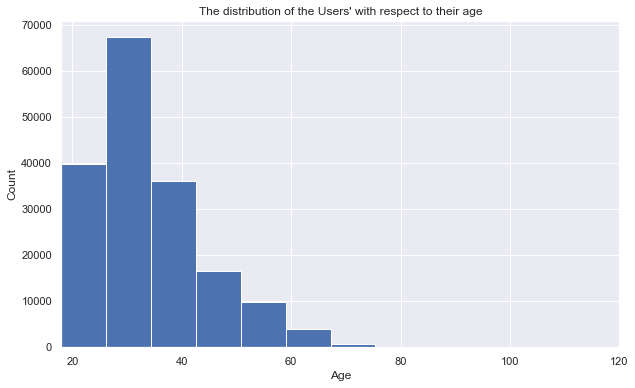

In [122]:
#This figure is aimed at showing the age disctribution of the users
fig = plt.figure(figsize=(10,6))
plt.hist(df['USER_AGE'], bins=15)

plt.ylabel('Count')
plt.xlabel('Age')
plt.title('The distribution of the Users\' with respect to their age');
plt.xlim(18,120)
plt.show()

> The **distribution** of the users is right-skewed (positive skewness) where users above 50 years old are much less. As such, the another curve will be used with more focus on the age group from 18-70

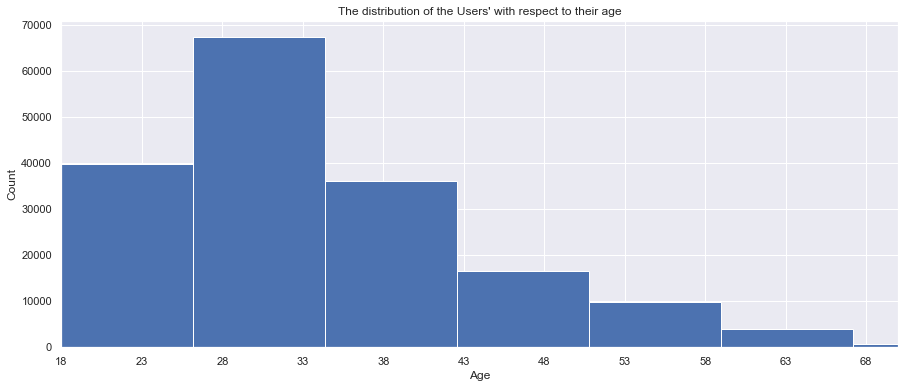

In [123]:
# investigating with more focus on the age group from 18-70
fig = plt.figure(figsize=(15,6))
plt.hist(df['USER_AGE'], bins=15)

plt.ylabel('Count')
plt.xlabel('Age')
plt.title('The distribution of the Users\' with respect to their age');
plt.xlim(18,70)
plt.xticks(np.arange(18,70,5))
plt.show()

> The **distribution** of the users (18*70) is still right-skewed (positive skewness)bu it can be notices that there is  peak ofor number of users ages from 28 to 33. Another curve will be used with more focus on the age group from 18-70

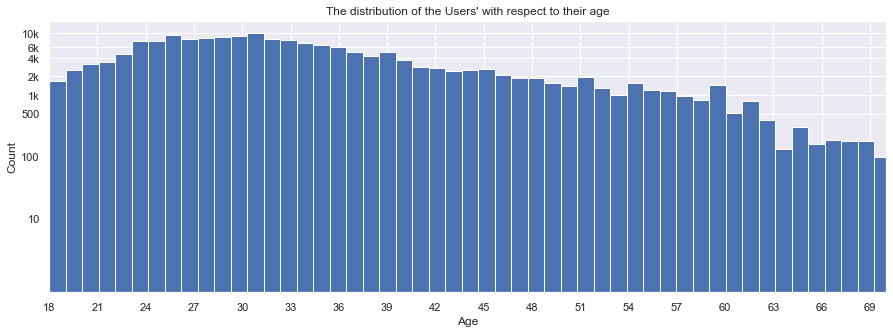

In [124]:
# using log on y axis to investigating further  with much more bins for better clarity of the age distribution
plt.figure(figsize=[15, 5])
plt.hist(data = df, x = 'USER_AGE', bins = 120)
plt.yscale('log')
plt.yticks([100,500,10, 1e3, 2e3, 4e3, 6e3, 1e4], [100,500, 10,'1k', '2k', '4k', '6k','10k'])
plt.ylabel('Count')
plt.xlabel('Age')
plt.title('The distribution of the Users\' with respect to their age');
plt.xlim(18,70)
plt.xticks(np.arange(18,70,3))
plt.show()

> The **distribution** of the users (18*70) is mcu cleaer here. bu it can be notices that the peak for number of users is fpr thoses aged from 30 to 32.

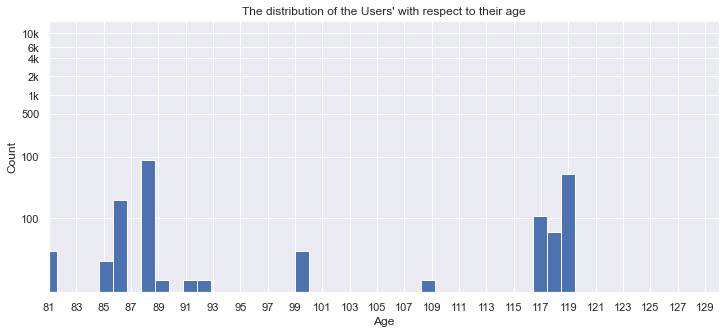

In [125]:
#Investaing the numbers of the senior users of age higher than 70 years old with small bins so that we can have a better view of the users of this age group
plt.figure(figsize=[12, 5])
plt.hist(data = df, x = 'USER_AGE', bins = 120)
plt.yscale('log')
plt.yticks([100,500,10, 1e3, 2e3, 4e3, 6e3, 1e4], [100,500, 100,'1k', '2k', '4k', '6k','10k'])
plt.ylabel('Count')
plt.xlabel('Age')
plt.title('The distribution of the Users\' with respect to their age');
plt.xlim(81,130)
plt.xticks(np.arange(81,130,2))
plt.show()

> For this graph, it can be seen the **distribution** is not smooth and but users aged (85-89) and(117-119) were observed as the highest number of users compared to their **age group**

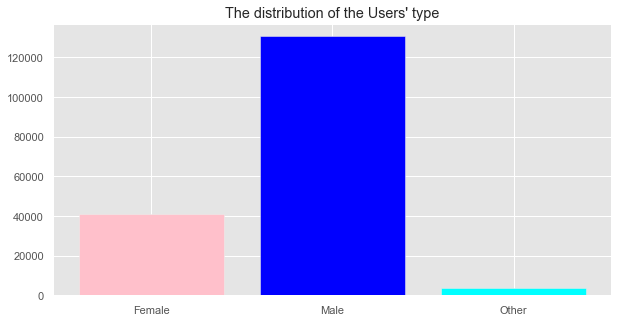

In [126]:

plt.figure(figsize=[10, 5])
plt.style.use('ggplot')
plt.locator_params(axis='x', integer=True)
labels, counts = np.unique(df['USER_GENDER'], return_counts=True)
plt.bar(labels, counts,color=['pink','blue' ,'cyan'])
plt.title('The distribution of the Users\' type')
plt.show()

> For this graph, it can be seenfrom  the **distribution** of users' genders that highest number of users are males, followed by females and then comes users of other gender

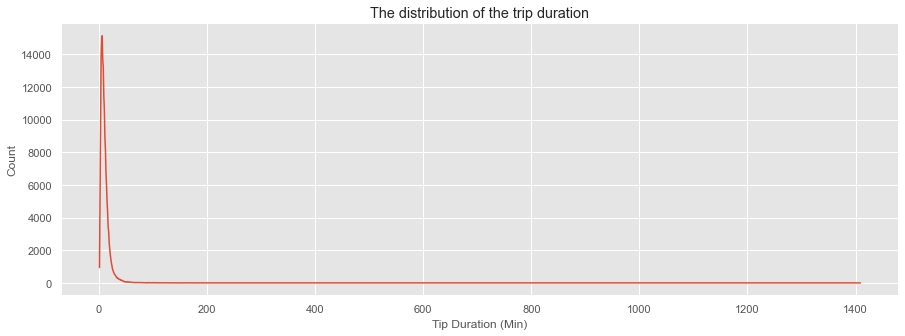

In [127]:
plt.figure(figsize=[15, 5])
df_T=df.groupby('TRIP_DURATION_MIN')['USER_TYPE'].count()
plt.plot(df_T)
plt.ylabel('Count')
plt.xlabel('Tip Duration (Min)')
plt.title('The distribution of the trip duration');
plt.show()

> The **distribution** of the users is right-skewed (positive skewness) where most user spend more time that is leas than 50 minutes. As such, the another curve will be used with more focus on the trip duration up to 30

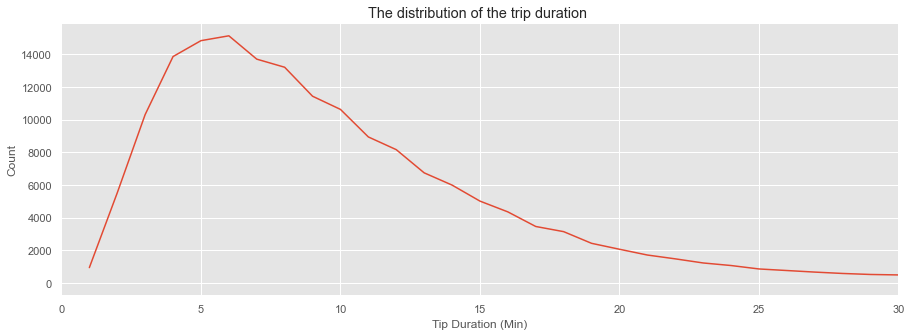

In [128]:
plt.figure(figsize=[15, 5])
df_Tx=df.groupby('TRIP_DURATION_MIN')['USER_TYPE'].count()
plt.plot(df_Tx)
plt.ylabel('Count')
plt.xlabel('Tip Duration (Min)')
plt.xlim(0,30)
plt.title('The distribution of the trip duration ');
plt.show()

> It is now much clearer that most user spend around **6 minutes** during a single trip.

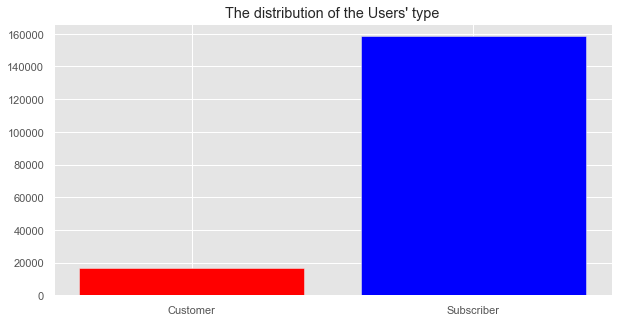

In [129]:
#Plotting the number of the customer and sucbscribers users 

plt.figure(figsize=[10, 5])
plt.style.use('ggplot')
plt.locator_params(axis='x', integer=True)
labels, counts = np.unique(df['USER_TYPE'], return_counts=True)
plt.bar(labels, counts,color=['red', 'blue'])
plt.title('The distribution of the Users\' type')

plt.show()


> Tt can be noted from the above plot that **subscriber** users are much more than customer users

## Bivariate Exploarations

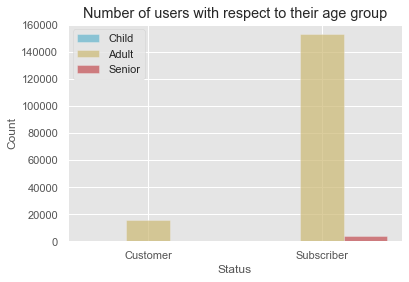

In [130]:
#Plotting the number of the customer vs sucbscribers users with respect to their age group, for a more clear and neat distribution. 
#Filter by age group
#Group one for users aged from 0 to 18 years old
child =df.query('USER_AGE<19')
child_g=child.groupby('USER_TYPE').count()
child_age=child_g['USER_AGE']

#Group two for users aged from 19 to 59 years old
adult=df.query('19<USER_AGE<60')
adult_g=adult.groupby('USER_TYPE').count()
adult_age=adult_g['USER_AGE']

#Group two for users who are above 60 years old
senior=df.query('USER_AGE>=60')
senior_g=senior.groupby('USER_TYPE').count()
senior_age=senior_g['USER_AGE']

#plot
width = 0.25
ind=np.arange(len(child_age))
child_bars = plt.bar(ind, child_age, width, color='c', alpha=.7, label='Child')
adult_bars = plt.bar(ind + width, adult_age, width, color='y', alpha=.7, label='Adult')
senior_Adult_bars = plt.bar(ind + (2*width), senior_age, width, color='r', alpha=.7, label='Senior')

# title and labels
plt.ylabel('Count')
plt.xlabel('Status')
plt.title('Number of users with respect to their age group')
locations = ind + width
labels = ['Customer', 'Subscriber']
plt.xticks(locations, labels);
plt.legend();

> The figure shows that **Adults** are the **dominant** bike users in subscriber and customer types. It can also be noted the number of **Child** users is **negligble** compared to adults and seniors, furthermore, **senior** users are more intersted in **subscription** as well as adults.

In [131]:
df.groupby('USER_GENDER')['USER_TYPE'].value_counts()

USER_GENDER  USER_TYPE 
Female       Subscriber     36182
             Customer        4623
Male         Subscriber    119007
             Customer       11493
Other        Subscriber      3197
             Customer         450
Name: USER_TYPE, dtype: int64

In [132]:
# This is to answer the second part of the question, starting by filtering the data by gender type and User_Type and then
#the proportions of males and females are calculated to better reflect on the gender numbers.
Male_Female=df.groupby('USER_GENDER')['USER_TYPE'].value_counts()
Male_Female_Total=df.groupby('USER_GENDER')['USER_AGE'].count()
Male_proportions=(Male_Female['Male']/Male_Female_Total['Male'])*100
Female_proportions=Male_Female['Female']/Male_Female_Total['Female']*100

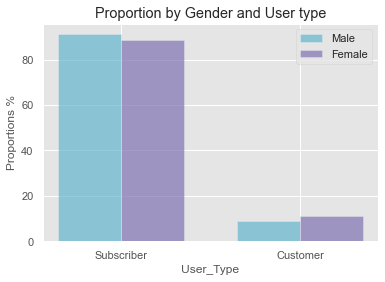

In [133]:
indx = np.arange(len(Male_proportions)) 
width = 0.35 # the width of the bars
# plot bars
Male_bars = plt.bar(indx, Male_proportions, width, color='c', alpha=.7, label='Male')
Female_bars = plt.bar(indx + width, Female_proportions, width, color='m', alpha=.7, label='Female')
# title and labels
plt.ylabel('Proportions %')
plt.xlabel('User_Type')
plt.title('Proportion by Gender and User type')
locations = indx + width / 2 
labels = ['Subscriber', 'Customer']
plt.xticks(locations, labels);
# legend
plt.legend();

> It can be seen from the **above plot**, that the percentage of Males who are subscribers are higher than that of Females. On the other hand there is a low percentage of both genders who are only customers and not subscribers at all

### In the **next** part of the **analysis**, the **trip duatrion** will be investigated with repect to diffrent **factors** such as gender, user's type and weekday.

<Figure size 432x288 with 0 Axes>

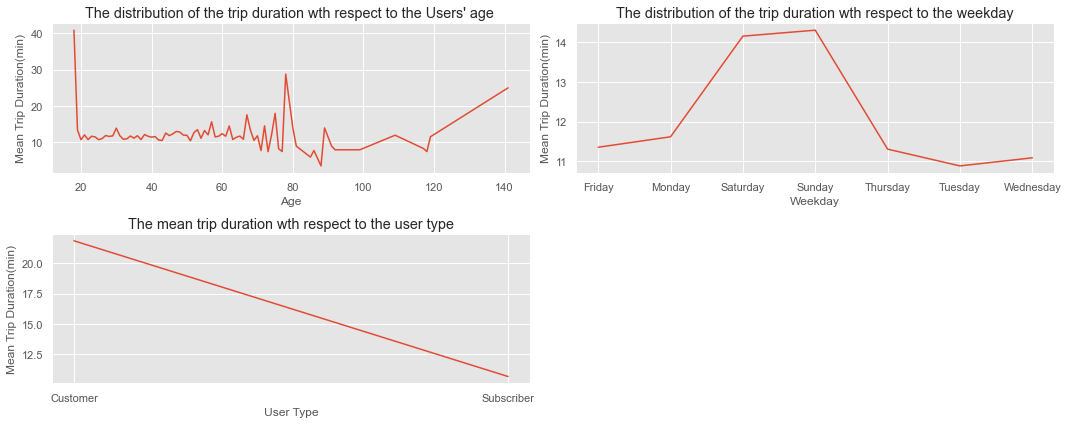

In [134]:
df_Age=df.groupby('USER_AGE')['TRIP_DURATION_MIN'].mean()
df_Weekday=df.groupby('START_DAY')['TRIP_DURATION_MIN'].mean()

df_Type=df.groupby('USER_TYPE')['TRIP_DURATION_MIN'].mean()
plt.figure()
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
plt.plot(df_Age)
plt.xlabel('Age')
plt.ylabel('Mean Trip Duration(min)')
plt.title('The distribution of the trip duration wth respect to the Users\' age ')

plt.subplot(2,2,2)
plt.plot(df_Weekday)
plt.xlabel('Weekday')
plt.ylabel('Mean Trip Duration(min)')
plt.title('The distribution of the trip duration wth respect to the weekday')

plt.subplot(2,2,3)
plt.plot(df_Type)
plt.xlabel('User Type')
plt.ylabel('Mean Trip Duration(min)')
plt.title('The mean trip duration wth respect to the user type')
plt.tight_layout()
plt.show()


The **first graph** shows that users aged 18 have the most trip duartion follwoed by those in their late 70s while there are very few in a very advanced age who spend some pretty much time as well but these are very fews that the didn't appear in the previous graphs. 

The **second graph** shows the mean duration spent on every day and as expected, the longest trip duations have been observed on the weekend; Saturday and Sunday.

The **third graph** shows the mean duration spent on by subscribers and customers, the longest trip duations have been observed for customers

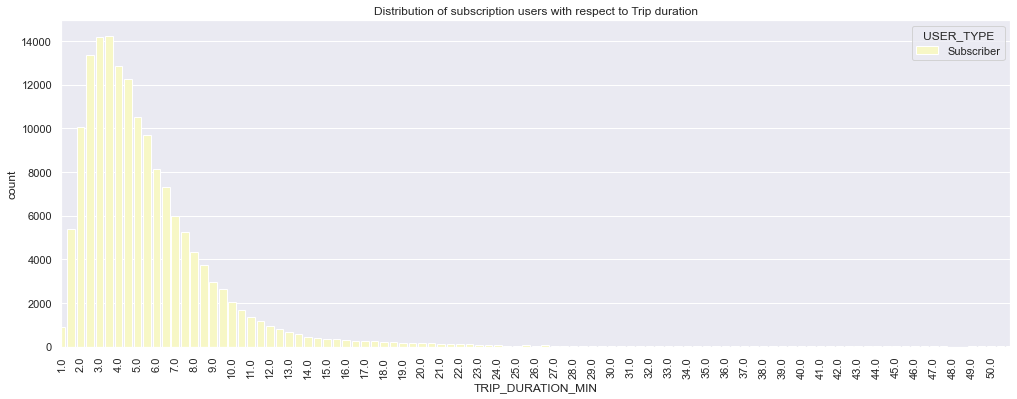

In [135]:
#This curve aimed at showing the distribution of trip duration spent by subscriber users
dfg =df.query("USER_TYPE=='Subscriber'")
sns.set(rc={'figure.figsize':(17,6)})
ALC=sns.countplot(x='TRIP_DURATION_MIN',data=dfg, hue='USER_TYPE',palette='Spectral')
plt.xlim(0,100)
plt.xticks(np.arange(0,100,2))
ALC.set_xticklabels(ALC.get_xticklabels(), rotation=90)
plt.title('Distribution of subscription users with respect to Trip duration')
sns.set_style("darkgrid")
plt.show()

> The **distribution** of the subscribers with repect tp the trip duartion is **right-skewed (positive skewness)** in that above plot, it can be seen that subscribers spend around **5 minutes** per single trip.  Another plot will be used to clarify the same point but with less x axis range

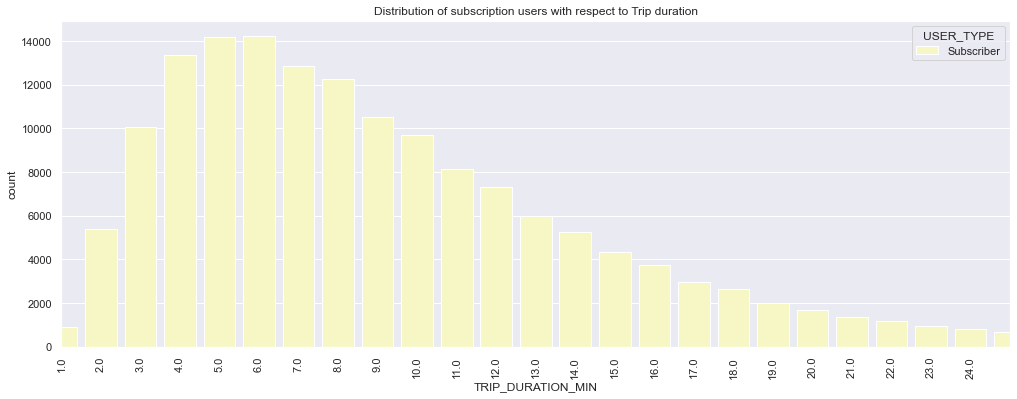

In [136]:
# investigating with more focus on the trip duration from 0-25
sns.set(rc={'figure.figsize':(17,6)})
ALC=sns.countplot(x='TRIP_DURATION_MIN',data=dfg, hue='USER_TYPE',palette='Spectral')
plt.xlim(0,24)
plt.xticks(np.arange(0,24,1))
ALC.set_xticklabels(ALC.get_xticklabels(), rotation=90)
plt.title('Distribution of subscription users with respect to Trip duration')
sns.set_style("darkgrid")
plt.show()

> Now it clear that the peak is at 6 minutes which is how much **subscribers** spend in a single trip

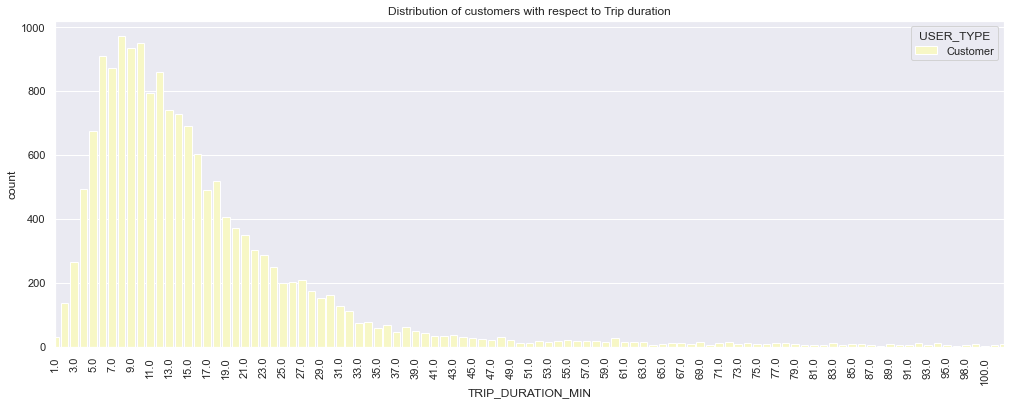

In [137]:
#This curve aimed at showing the distribution of trip duration spent by customer users
dfy =df.query("USER_TYPE=='Customer'")
ALC=sns.countplot(x='TRIP_DURATION_MIN',data=dfy, hue='USER_TYPE',palette='Spectral')
ALC.set_xticklabels(ALC.get_xticklabels(), rotation=90)
sns.set(rc={'figure.figsize':(17,6)})
plt.xlim(0,100)
plt.xticks(np.arange(0,100,2))
plt.title('Distribution of customers with respect to Trip duration')
sns.set_style("darkgrid")
plt.show()

> This distribution is mostly like a **poission** distribution. hepeak lies around 7-9 minutes, another plot with less x-axis range will be used for a clearer investigation. 

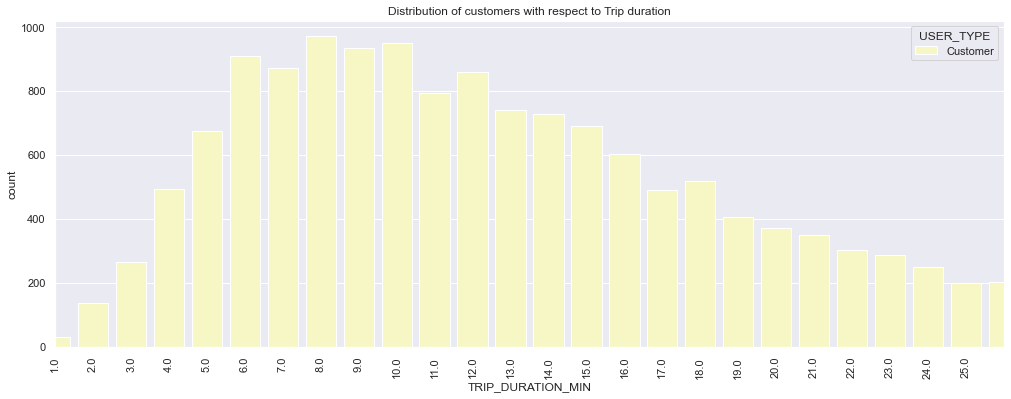

In [138]:
# investigating with more focus on the trip duration from 0-25
ALC=sns.countplot(x='TRIP_DURATION_MIN',data=dfy, hue='USER_TYPE',palette='Spectral')
ALC.set_xticklabels(ALC.get_xticklabels(), rotation=90)
sns.set(rc={'figure.figsize':(17,6)})
plt.xlim(0,25)
plt.xticks(np.arange(0,25,1))
plt.title('Distribution of customers with respect to Trip duration')
sns.set_style("darkgrid")
plt.show()

> It is clear now that most customers spend **8 minutes** for a sinlge trip. The **next** plots are aimed at clearer data investigation for the same parameters. 

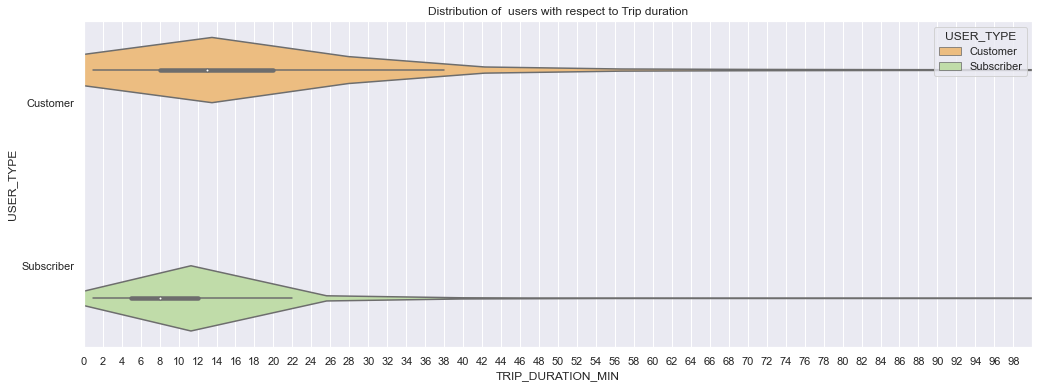

In [139]:
# This plot is aimed at showing the distribution of users with respest to their type and trip duration
ax=sns.violinplot(x='TRIP_DURATION_MIN',y='USER_TYPE',data=df, hue='USER_TYPE',palette='Spectral')
sns.set(rc={'figure.figsize':(15,6)})
ax.set_xlim(0,100)
plt.xticks(np.arange(0,100,2))
plt.title('Distribution of  users with respect to Trip duration')
sns.set_style("darkgrid")
plt.show()

> It can be seen that **customer** users are more **likely** to spend more time for a **single** trip than **subscribers** 

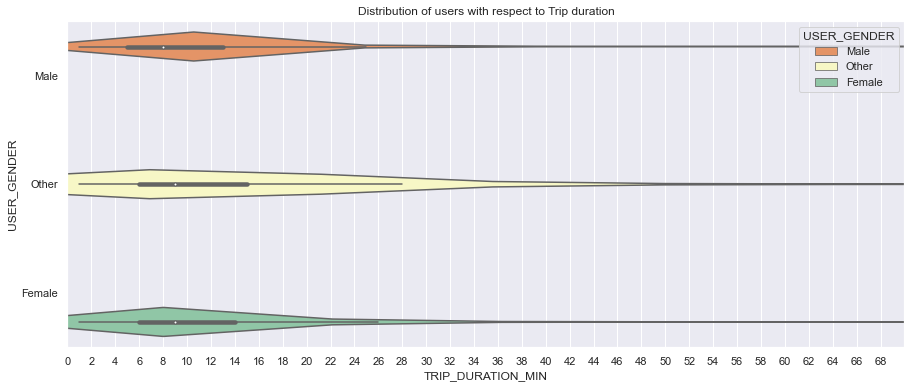

In [140]:
# This plot is aimed at showing the distribution of users with respest to their gender and trip duration
ax=sns.violinplot(x='TRIP_DURATION_MIN',y='USER_GENDER',data=df, hue='USER_GENDER',palette='Spectral')
sns.set(rc={'figure.figsize':(17,6)})
ax.set_xlim(0,70)
plt.xticks(np.arange(0,70,2))
plt.title('Distribution of users with respect to Trip duration')
sns.set_style("darkgrid")
plt.show()

> It can be seen that users of **other** genders are more **likely** to spend more time for a **single** trip followed by **female** users after which comes **male** users.

### Multivariate Exploration
In this part of the analysis, I would like to track members who are enrolled in the Bike Share for All program and investigate their age, gender, user type as well as their usage pattern facots such as the weekday of usage

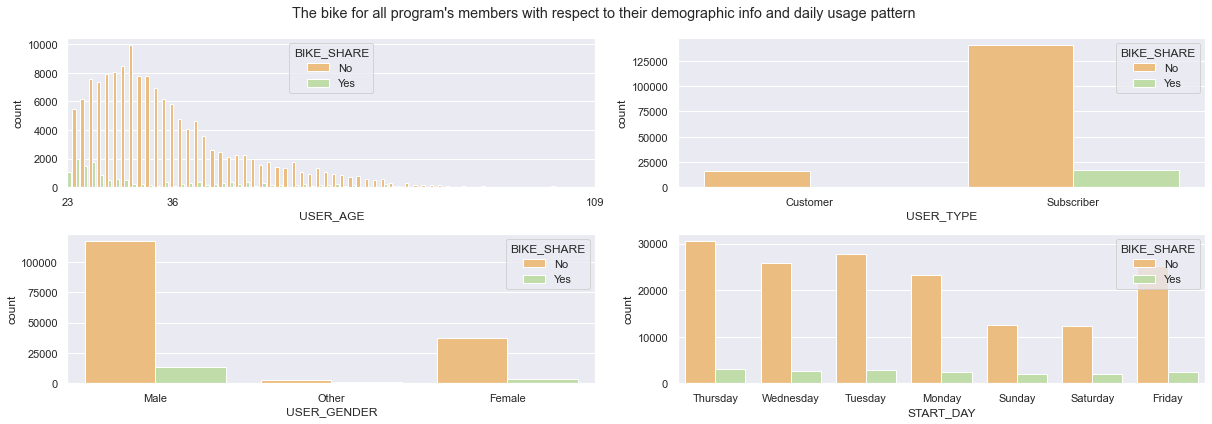

In [141]:

fig, axes = plt.subplots(nrows=2, ncols=2)
hx=sns.countplot(ax=axes[0,0], x='USER_AGE',data=df, hue='BIKE_SHARE',palette='Spectral')
hx.set(xlim=(18,70),xticks=[18,70,5])
sns.countplot(ax=axes[0,1],x='USER_TYPE',data=df, hue='BIKE_SHARE',palette='Spectral')
sns.countplot(ax=axes[1,0],x='USER_GENDER',data=df, hue='BIKE_SHARE',palette='Spectral')
sns.countplot(ax=axes[1,1],x='START_DAY',data=df, hue='BIKE_SHARE',palette='Spectral')
fig.suptitle(('The bike for all program\'s members with respect to their demographic info and daily usage pattern '))
plt.tight_layout()
plt.show()

> Most of the **members** of the bike share program are in their **20s** and mostly they are **males** and **subscribers** . For the usage pattern, unlike the non members, they kept almost a **stable** usage pattern over the sevens day of the week

<a id='conclusions'></a>
## Conclusions

**Two** factors have been analyzed to check for the effect on the trip duration. these factors are as follows:
**1**-Age Group: Young users(<20) and senior users(late 70s) are more likely to spend more time on the bike trip
**2**-Weekday: the longest trip duations have been observed on the weekend; Saturday and Sunday.


For the **subscription status**, it has been found that the percentage of Males who are subscribers are higher than that of Females. Furthermore, it has aslmo been found that the age of most of the bike users lies around 30 years old.

The bike share program members are mostly males who are in their **20s** and mostly they are **subscribers** with a almost a stable usage pattern over the weekdays.

### Limitations
1. The analysis is limited to the available data 
2. The analysis results concerning the second part of the anaylsis might be misleading as no proportions have been considred for the data which could have affected the precision of the results.
.





<a id='references'></a>
## References

1. https://stackoverflow.com/questions/33149428/modify-the-legend-of-pandas-bar-plot
2. https://www.geeksforgeeks.org/python-pandas-index-value_counts/#:~:text=value_counts()%20function%20returns%20object,Excludes%20NA%20values%20by%20default.
3. https://www.geeksforgeeks.org/how-to-rename-multiple-column-headers-in-a-pandas-dataframe/
4. https://stackoverflow.com/questions/35595710/splitting-timestamp-column-into-separate-date-and-time-columns
5. https://stackoverflow.com/questions/25239933/how-to-add-title-to-subplots-in-matplotlib
6. https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.min.html
7. https://www.geeksforgeeks.org/pandas-groupby-multiple-values-and-plotting-results/
8. https://stackoverflow.com/questions/61900478/reduce-y-ticks-spacing-for-histograms-in-matplotlib
9. https://stackoverflow.com/questions/33140496/how-to-substract-a-single-value-from-column-of-pandas-dataframe
10. https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib
11. https://stackoverflow.com/questions/66152160/how-to-center-labels-in-histogram-in-matplotlib